## ML Project

### Chauhan Hardik

This code was written in kaggle Notebook.

In [1]:
import warnings

# Ignore all FutureWarnings (you can also target specific categories)
warnings.filterwarnings("ignore", category=FutureWarning)

# Ignore all UserWarnings (if necessary)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
pip install scikit-learn==1.5.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 91.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.10.0, but you have google-cloud-bigquery 2.34.4 which is incompatible.
bigframes 0.22.0 requires google-cloud-storage>=2.0.0, but you have google-cloud-storage 1.44.0 which is incompatible.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.2 which is incompatible.
cesium 0.12.3 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
dataproc-jupyter-plugin 0.1.79 requires pydantic~=1.10.0, but you have pydantic 2.9.2 which is incompatible.
Note:

In [3]:
pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install symspellpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 39.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 kB 9.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Import Libraries

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re
import contractions
from symspellpy import SymSpell, Verbosity
from wordcloud import WordCloud

# Read and Explore Dataset 

In [6]:
# Load the dataset
data = pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip')

In [7]:
# Display the dataset
data.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
93695,fa8722b8ff92a7be,I thought Leon Scott Kennedy will appear first...,0,0,0,0,0,0
27195,47f09c9506d0f100,"""\n\n Please Create Article about """"Chiragh Ba...",0,0,0,0,0,0
127436,a990f163c50ddc6d,"""\n\nre unblock template\nThanks a lot. Now ev...",0,0,0,0,0,0
79639,d51244ccb32de14a,its vandalism. it's a reference to how he knoc...,0,0,0,0,0,0
69925,bb0d393d11cb1f68,}}\n{{Image requested|people of the United Sta...,0,0,0,0,0,0


In [8]:
# Overview of datasets structure, column data types, non-null counts.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


# Reduce not_cyberbullying instances

In [9]:
data = data.drop('severe_toxic', axis=1)

In [10]:
# Identify rows where all labels are 0
not_cyberbullying_df = data[(data['toxic'] == 0) & (data['obscene'] == 0) & (data['threat'] == 0) &
                          (data['insult'] == 0) & (data['identity_hate'] == 0)]

# Sample 15,000 rows from the 'not_cyberbullying' subset
not_cyberbullying_sample = not_cyberbullying_df.sample(n=15000, random_state=42)

# Get the remaining rows (where at least one label is 1)
cyberbullying_df = data.drop(not_cyberbullying_df.index)

# Combine the sampled 'not_cyberbullying' data with the rest of the data
train_df = pd.concat([cyberbullying_df, not_cyberbullying_sample], axis=0)

# Reset the index without shuffling
train_df = train_df.reset_index(drop=True)

In [11]:
# Overview of datasets structure, column data types, non-null counts.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31225 entries, 0 to 31224
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             31225 non-null  object
 1   comment_text   31225 non-null  object
 2   toxic          31225 non-null  int64 
 3   obscene        31225 non-null  int64 
 4   threat         31225 non-null  int64 
 5   insult         31225 non-null  int64 
 6   identity_hate  31225 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.7+ MB


# Data Cleaning Functions

In [12]:
# Drop row which has missing comment_text
train_df = train_df.dropna(subset=['comment_text'])

In [13]:
# Convert text to lowercase

def convert_to_lowercase(text):
    """
    Convert the given text to lowercase.
    """
    return text.lower()

# Display sample lowercase comments
display(convert_to_lowercase("Hello, How are you?"))

'hello, how are you?'

In [14]:
# Handle @, # and $ 
def process_text(text):
    """
    Replace special characters based on specific rules:
    - `$` to `s` only if followed by `l`, `1`, `!`, 'e', '*'
    - Replace any word with `<USER>` if it contains `@` followed by `s` or `$`.
    """
    # Replace `$` with `s` only when followed by `l`, `1`, `!` , 'e', '*'
    text = re.sub(r'\$(?=[l1!e*])', 's', text)

    # Replace words containing `@` followed by `s` or `$` with <USER>
    text = re.sub(r'@(?=ss|\$\$|\$s|s\$)', 'a', text)

    # Replace `#` with `h` only when followed by `a` and 't'
    text = re.sub(r'#(?=\w*(at|@+|@t|a+))', 'h', text)

    return text

# Check
display(process_text("hello @hardik, how are you?? $ex, $lut, @ttack @$shole, @sshole, @s$hole $lime, $un, f@ck, hi@there, @sassy, @cool, good$by, love$ick #ate #@te #@+e #a+e"))

'hello @hardik, how are you?? sex, slut, @ttack a$shole, asshole, as$hole slime, $un, f@ck, hi@there, @sassy, @cool, good$by, love$ick hate h@te h@+e ha+e'

In [15]:
# Masked words

# Define common offensive words with regex patterns
offensive_patterns = {
    "fuck": r"\b[f|_|*][\W_]*[u|*|@|_][\W_]*[c|*|_][\W_]*[k|*|_](?:[e|*|r|_|*|s|ing]*)?\b",
    "shit": r"\b[s|$|5][\W_]*[h|*|#][\W_]*[i|!|*|1][\W_]*[t|*|+]\b",
    "bitch": r"\b[b|*|8][\W_]*[i|!|1|*][\W_]*[t|*][\W_]*[c|*][\W_]*[h|*](?:[s|*]*)?\b",
    "asshole": r"\b[a|@][\W_]*[s|$|*][\W_]*[s|$|*|5][\W_]*[h|*|#][\W_]*[o|0|*][\W_]*[l|*|1][\W_]*[e|*|3]\b",
    "cocksucker": r"\b[c|k][\W_]*[o|0][\W_]*[c|*][\W_]*[k|*][\W_]*[s|$][\W_]*[u|*][\W_]*[c|*][\W_]*[k|*][\W_]*[e|*][\W_]*[r|*]\b",
    "motherfucker": r"\b[m|*][\W_]*[o|0][\W_]*[t|*|+][\W_]*[h|*|#][\W_]*[e|*][\W_]*[r|*][\W_]*[f|ph][\W_]*[u|*|@][\W_]*[c|*|_][\W_]*[k|*][\W_]*[e|*][\W_]*[r|*]\b",
    "slut": r"\b[s|$][\W_]*[l|*][\W_]*[u|*][\W_]*[t|*]\b",
    "whore": r"\b[w|h|#][\W_]*[o|0|*][\W_]*[r|*][\W_]*[e|*]\b",
    "punk": r"\b[p|*][\W_]*[u|*][\W_]*[n|*][\W_]*[k|*]\b",
    "crap": r"\b[c|*][\W_]*[r|*][\W_]*[a|@][\W_]*[p|*]\b",
    "loser": r"\b[l|*][\W_]*[o|0|*][\W_]*[s|$][\W_]*[e|*][\W_]*[r|*]\b",
    "gay": r"\b[g|*][\W_]*[a|@][\W_]*[y|*]\b",
    "retarded": r"\b[r|*][\W_]*[e|*][\W_]*[t|*][\W_]*[a|@][\W_]*[r|*][\W_]*[d|*][\W_]*[e|*][\W_]*[d|*]\b",
    "dumb": r"\b[d|*][\W_]*[u|*][\W_]*[m|*][\W_]*[b|*|8]\b",
    "freak": r"\b[f|*][\W_]*[r|*][\W_]*[e|*][\W_]*[a|@][\W_]*[k|*]\b",
    "kill": r"\b[k|*][\W_]*[i|!][\W_]*[l|*|!][\W_]*[l|*|!]\b",
    "die": r"\b[d|*][\W_]*[i|!|1][\W_]*[e|*|3]\b",
    "hate": r"\b[h|*|#][\W_]*[a|@][\W_]*[t|*|+][\W_]*[e|*]\b",
    "ugly": r"\b[u|*][\W_]*[g|*][\W_]*[l|*][\W_]*[y|*]\b",
    "nerd": r"\b[n|*][\W_]*[e|*|3][\W_]*[r|*][\W_]*[d|*]\b",
    "sex": r"\b[s|5|$][\W_]*[e|3][\W_]*[x|*]\b",
    "dick": r"\b[d|*][\W_]*[i|!][\W_]*[c|*][\W_]*[k|*]\b",
    "fat": r"\b[f|*][\W_]*[a|@][\W_]*[t|*]\b",
    "stupid": r"\b[s|$|*][\W_]*[t|*|+][\W_]*[u|*][\W_]*[p|*][\W_]*[i|!][\W_]*[d|*]\b",
    "boobs": r"\b[b|8][\W_]*[o|0|*][\W_]*[o|0|*][\W_]*[b|8][\W_]*[s|$]\b",
    "nipple": r"\b[n|*][\W_]*[i|!|1][\W_]*[p|*][\W_]*[p|*][\W_]*[l|*|1][\W_]*[e|*]\b",
    "moron": r"\b[m|*][\W_]*[o|0][\W_]*[r|*][\W_]*[o|0|*][\W_]*[n|*]\b",
    "nigga": r"\b[n|*][\W_]*[i|1|!][\W_]*[g|*][\W_]*[g|*][\W_]*[a|@]\b",
    "cock": r"\b[c|k][\W_]*[o|0][\W_]*[c|k]\b",
    "ass": r"\b[a|@][\W_]*[s|$|*]{2}\b",
    "suck": r"\b[s|$|5][\W_]*[u|*][\W_]*[c|*][\W_]*[k|*]\b",
    "dumbass": r"\b[d|*][\W_]*[u|*][\W_]*[m|*][\W_]*[b|*][\W_]*[a|@][\W_]*[s|$|*]{2}\b",
    "dumass": r"\b[d|*][\W_]*[u|*][\W_]*[b|*][\W_]*[a|@][\W_]*[s|$|*]{2}\b",
    "bullshit": r"\b[b|8][\W_]*[u|*][\W_]*[l|*][\W_]*[l|*][\W_]*[s|$|5][\W_]*[h|*|#][\W_]*[i|!][\W_]*[t|*|+]\b",
    "cunt": r"\b[c|*][\W_]*[u|*][\W_]*[n|*][\W_]*[t|*]\b",
}

# Define the function to replace masked words
def replace_masked_words(text):
    """
    Replace makked words with their actual form in the given text.
    """
    for word, pattern in offensive_patterns.items():
        text = re.sub(pattern, word, text)
    return text

# Check
display(replace_masked_words("f**k du*8 c0ck cok du*@ss f_ck f__k f_u_c_k fu*ker d!e a$$hole f*** m0+#erf**ker $ex $lut @sshole"))

'fuck dumb c0ck cock dumass fuck fuck fuck fuck die asshole f*** motherfucker $ex $lut @sshole'

In [16]:
# Replace URLs with a placeholder

def replace_urls(text):
    """
    Replace URL's in the given text with a placeholder <URL>.
    """
    return re.sub(r'http\S+|www\S+|https\S+', '<URL>', text)

# Check
display(replace_urls("Please visit https://www.google.com/"))

'Please visit <URL>'

In [17]:
# Abbreviations

# Define common used abbreviations
abbreviations = {
    "4ao" : "for adults only",
    "every1": "eveeryone",
    "urself": "yourself",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "insta": "instagram",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "b4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "perv" : "pervert",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired",
    "lov" : "love",
    "2mw" : "tomorrow",
    "r" : "are",
    "helo": "hello",
    "y" : "why",
    "ur": "your",
    "u" : "you",
    "xoxo": "hugs and kisses"
}

# Define the function for abbrevations
def replace_abbreviations(text):
    """
    Replace abbreviations with their full forms in the given text.
    """
    for abbr, full_form in abbreviations.items():
        text = re.sub(r'\b' + re.escape(abbr) + r'\b', full_form, text)  # Replace abbreviation with full form
    return text

# Check
display(replace_abbreviations("brb, wtf, mf, cya insta"))

'be right back, what the fuck, motherfucker, see you instagram'

In [18]:
# Contractions

def expand_contractions(text):
    """
    Expands common contractions in the text to their full form.
    """
    return contractions.fix(text)

# Check
display(expand_contractions("i'm , don't"))

'i am , do not'

In [19]:
# Remove \n characters

def remove_newlines(text):
    """
    Remove all newline characters from the text.
    """
    return text.replace('\n', ' ')  # Replace newlines with a space (or '' to remove entirely)

# Check
display(remove_newlines("hello \n\nhow are\n you?"))

'hello   how are  you?'

In [20]:
# Remove punctuations

def remove_punctuation(text):
    """
    Remove all punctuation from the text except for <USER> and <URL>.
    """
    # # Regular expression to remove all punctuation except <USER> and <URL>
    text = re.sub(r'[^\w\s<URL>]', '', text)
    return text


# Check
display(remove_punctuation("hello, @how are you?"))

'hello how are you'

In [21]:
# Remove repeated letters  (yessss -> yess)

def remove_repeated_letters(text):
    # Split text into words
    words = text.split()
    corrected_words = []

    for word in words:
        # Reduce repeated characters to 2 if there are more than 2 occurrences
        corrected_word = re.sub(r'(.)\1{2,}', r'\1\1', word)
        corrected_words.append(corrected_word)

    return ' '.join(corrected_words)
display(remove_repeated_letters("yesss, howw, whatttt, cool"))

'yess, howw, whatt, cool'

In [22]:
# Spell Correction with Cyberbullying Word Priority

# Initialize SymSpell
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

# Load the standard frequency dictionary
sym_spell.load_dictionary("/kaggle/input/frequency-dictionary/frequency_dictionary_en_82_765.txt", term_index=0, count_index=1)

sym_spell.create_dictionary_entry("noob", 11408100)      # Frequency for 'noob'
sym_spell.create_dictionary_entry("dumbass", 19501851)   # Frequency for 'dumbass'
sym_spell.create_dictionary_entry("asshole", 126713392)  # Frequency for 'asshole'


# Define a list of cyberbullying words
cyberbullying_words = {
    "noob", "dumbass", "asshole", "bitch", "slut", "whore", "idiot", "loser", "retard", "stupid",
    "fuck", "hate", "fag", "bastard", "cunt", "douchebag", "pussy", "gay", "fatass", "ugly",
    "moron", "cock", "dickhead", "scumbag", "shithead", "dick", "prick", "bitchass", "nerd", "geek",
    "jackass", "twat", "skank", "slob", "worthless", "wimp", "freak", "asswipe", "tool", "creep",
    "assclown", "dumbfuck", "douche", "shitbag", "stinker", "pansy", "weakling", "chump", "dipshit",
    "scum", "pig", "stalker", "cocksucker", "bimbo", "slutty", "hoe", "total", "asshat", "buttface", "cockroach",
    "numbnuts", "shitforbrains", "fool", "dipstick", "turd", "garbage", "manwhore", "cumslut", "suck",
    "nigger", "whimp", "blowjob", "homo", "faggot", "wuss", "coward", "vulgar", "jerk", "harlot", "dumb",
    "looser", "fucktard", "lame", "bitchy", "scummy", "bleep", "whoreish", "murderer", "gimp", "stooge",
    "simpleton", "gullible", "bastardize", "jerkoff", "wanker", "noobish", "retarded", "punk", "crap",
    "sex", "fat", "boobs", "nipple", "nigga", "ass", "dumass", "bullshit", "likes", "attack", "abuse",
}

# Function for spell correction with cyberbullying word priority
def correct_spelling_with_priority(text):
    """
    Correct spelling using SymSpell, prioritizing predefined cyberbullying words.
    """
    corrected_words = []
    
    for word in text.split():
        # Get all suggestions from SymSpell
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
        
        if suggestions:
            # Get all possible corrections
            possible_words = {s.term for s in suggestions}
            
            # Check if any match a cyberbullying word
            toxic_match = next((w for w in possible_words if w in cyberbullying_words), None)
            
            if toxic_match:
                # Use the matched cyberbullying word
                corrected_words.append(toxic_match)
            else:
                # Otherwise, use the highest frequency word
                corrected_words.append(suggestions[0].term)
        else:
            # If no suggestions, keep the original word
            corrected_words.append(word)
    
    # Return the corrected sentence
    return " ".join(corrected_words)

# Test the function
input_text = " dumass totl @hardik 8!tch fuse buse ttack @ sleapy and tehre is no plaxe I'm gioong. yess whatt noob b!tch @s$hole @ttack @shubham sex dumbass"
corrected_text = correct_spelling_with_priority(input_text)
print(corrected_text)

dumbass total hardin bitch fuse abuse attack a sleepy and there is no place i'm gioong. yes what noob bitch asshole attack @shubham sex dumbass


In [23]:
# Remove numbers

def remove_numbers(text):
    """
    Remove numerical values from the text using regex.
    """
    return re.sub(r'\d+', '', text)

# Check
display(remove_numbers("hello 1 hi 2 3 bye"))

'hello  hi   bye'

In [24]:
# Remove leading and trailing whitespaces and multiple spaces in the sentence

def strip_text(text):
    """
    # Replace multiple spaces with a single space and remove leading/trailing spaces
    """
    return re.sub(r'\s+', ' ', text).strip()

# Check
display(strip_text("   hello how   are you    "))

'hello how are you'

In [25]:
# Master function (includes all cleaning steps)
def clean_text(text):
    text = convert_to_lowercase(text) 
    text = process_text(text) 
    text = replace_masked_words(text) 
    text = replace_urls(text)
    text = replace_abbreviations(text) 
    text = expand_contractions(text) 
    text = remove_newlines(text)
    text = remove_repeated_letters(text)
    text = remove_punctuation(text)
    text = correct_spelling_with_priority(text)
    text = remove_numbers(text)
    text = strip_text(text) 

    return text

# Data Cleaning 

In [26]:
# Apply text cleaning to all comments
train_df['cleaned_text'] = train_df['comment_text'].apply(clean_text)

# Count the number of words in each comment
train_df['word_count'] = train_df['cleaned_text'].apply(lambda x: len(x.split()))

# Remove rows with more than 250 words (optional)
train_df = train_df[train_df['word_count'] <= 250]

# Add a column to count the number of active tags per comment
train_df['tag_count'] = train_df[['toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1)

# Data Inspection After Cleaning

In [27]:
# Check the updated dataset
print(f"Dataset shape after cleaning: {train_df.shape}")
print("Sample cleaned data:")
display(train_df.sample(25))

Dataset shape after cleaning: (30054, 10)
Sample cleaned data:


,id,comment_text,toxic,obscene,threat,insult,identity_hate,cleaned_text,word_count,tag_count
11429,58a0095956f7c1ea,"""\n\n Sycophants \n\n"""" Please do not attack o...",1,1,0,1,0,sycophants please do not attack other editors ...,47,3
13895,d866e0fcda8a5f7c,"Yes, Mr Fat was a stupidly drunken attempt at ...",1,0,0,0,0,yes mister fat was a stupidly drunken attempt ...,85,1
9622,fc311029d5ee720b,"fuck you then, im done with this website.",1,1,0,1,0,fuck you then i am done with this website,9,3
8174,d4e2fb944f08eba7,Why are my posts being deleted? \n\nI think de...,1,0,0,0,0,why are my posts being deleted i think deep ﻿t...,54,1
9849,0403233b8821a525,F**** and Happy New Year to you too. Have been...,1,0,0,1,0,of and happy new year to you too have been bus...,103,2
22696,b539e0362da24ff9,"""\n\n Thanks for the headup \n\nYou've reminde...",0,0,0,0,0,thanks for ﻿the head you have reminded me of ﻿...,54,0
29820,64cd175a9d097a11,"""\n\nExtensive edits\n\nThe page had been flag...",0,0,0,0,0,extensive edits ﻿the page had been flagged as ...,80,0
17696,3762c80acb4361e9,Wow \nThanks! You are SO amazing! I am in awe ...,0,0,0,0,0,wow thanks you are so amazing i am in awe of y...,189,0
27253,e62d63209bca0725,""" Unlike the Gay Nigger Association of America...",0,0,0,0,0,unlike ﻿the gay nigger association of america ...,61,0
23139,72d87f1a9b4545bc,"Why thank you, Mr. Penguin, you flatter me. -)...",0,0,0,0,0,why thank you mister penguin you flatter me re...,35,0


In [28]:
display(clean_text("  #ate afuse, sleapy and tehre is no plaxe I'm gioong. brb, @s$hole ### gioong %%% & f**k u b!tch @ss#ole cooool insta yessss full fool $lut f_u_c_k hi@there brb @hardik https://google.com/  dumbass whatevr @shubham"))

'hate abuse sleepy and there is no place i am going be right back asshole going fuck you bitch asshole cool instagram yes full fool slut fuck hither be right back hardin <URL> dumbass whatever shushan'

In [29]:
display(clean_text("@sshole @$shole @s$#ole @JohnDoe ur such a dum looser evryone knws ur a tot*l failr at lyfe, just giv up alredy! #Losr #Useless & nobody evn lykes u anywys."))

'asshole asshole asshole johnson your such a dumb looser everyone knows your a total fair at life just give up already loser useless nobody even likes you anyways'

# Exploratory Data Analysis 1 (EDA) - Visualization

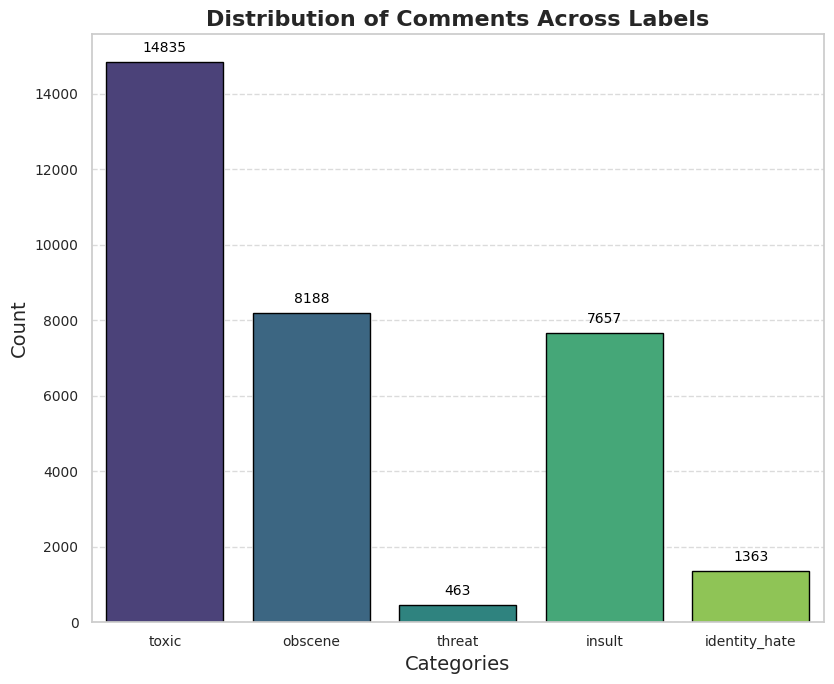

In [30]:
#Distribution of Comments Across Labels

# Set a style for the plot
sns.set(style="whitegrid")

# Visualize the distribution of the target labels
plt.figure(figsize=(8.5, 7))
barplot = sns.barplot(
    x=train_df[['toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum().index,
    y=train_df[['toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum().values,
    palette='viridis', edgecolor='black'
)

# Add counts on top of each bar
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=10, color='black', 
                     xytext=(0, 5),  # Adjusts the position of the text
                     textcoords='offset points')

# Enhance title and labels
plt.title("Distribution of Comments Across Labels", fontsize=16, fontweight='bold')
plt.ylabel("Count", fontsize=14)

plt.xlabel("Categories", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

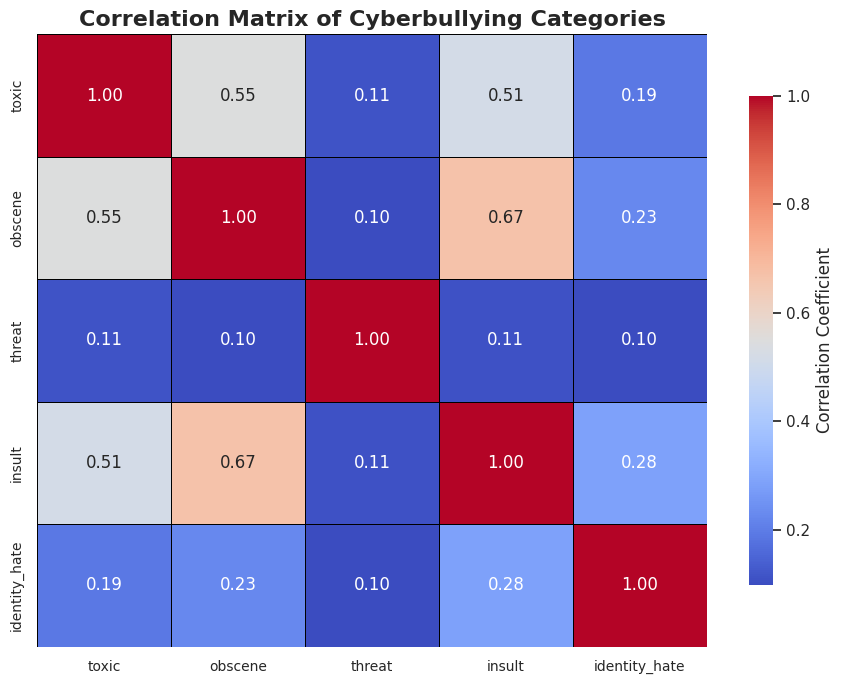

In [31]:
# Correlation Heatmap
plt.figure(figsize=(9, 7))
correlation_matrix = train_df[['toxic', 'obscene', 'threat', 'insult', 'identity_hate']].corr()
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", 
                      cbar_kws={"shrink": .8, 'label': 'Correlation Coefficient'}, 
                      linewidths=.5, linecolor='black')

# Enhance title and labels
plt.title("Correlation Matrix of Cyberbullying Categories", fontsize=16, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [32]:
# Labels
category_columns = ['toxic', 'obscene', 'threat', 'insult', 'identity_hate']

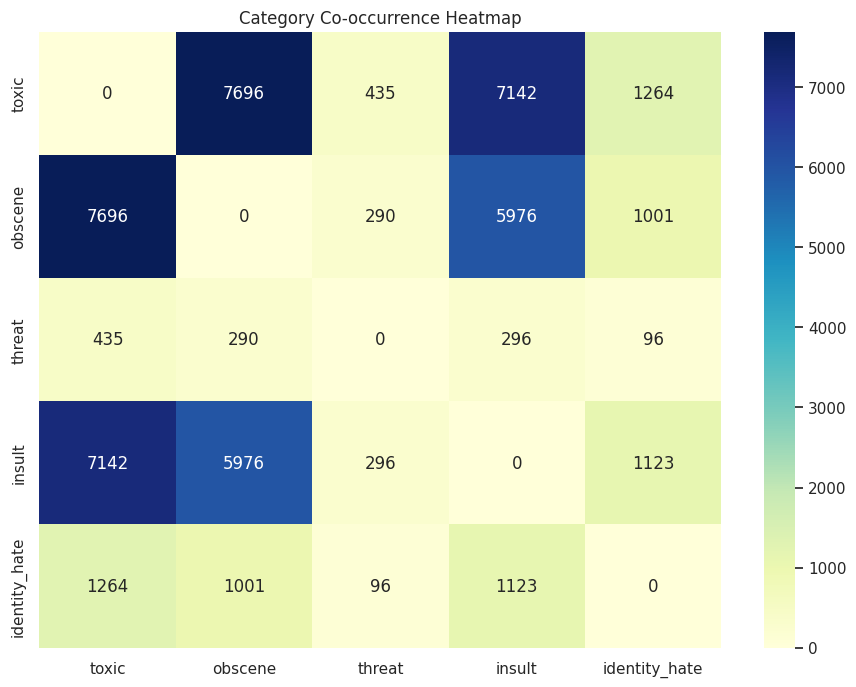

In [33]:
#Co-occurrence 

# Create a co-occurrence matrix by transposing and dot product
co_occurrence_matrix = train_df[category_columns].T.dot(train_df[category_columns])

# Optional: Remove diagonal (self-correlation) for a cleaner plot
np.fill_diagonal(co_occurrence_matrix.values, 0)
# Plot the heatmap
plt.figure(figsize=(11, 8))
sns.heatmap(co_occurrence_matrix, annot=True, cmap="YlGnBu", fmt="d", cbar=True)
plt.title("Category Co-occurrence Heatmap")
plt.show()

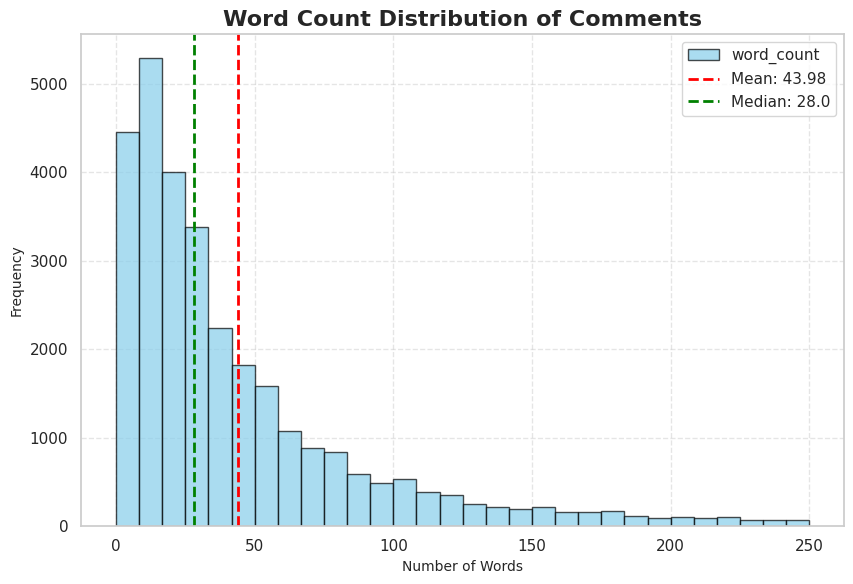

In [34]:
# Word Count distribution
plt.figure(figsize=(8.7, 6))

# Plot the histogram with improved customization
ax = train_df['word_count'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Add a vertical line for the mean
mean = train_df['word_count'].mean()
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

# Add a vertical line for the median
median = train_df['word_count'].median()
plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median}')

# Add a title and labels with improved readability
plt.title('Word Count Distribution of Comments', fontsize=16, fontweight='bold')
plt.xlabel('Number of Words', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

# Add a legend
plt.legend()

# Improve layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

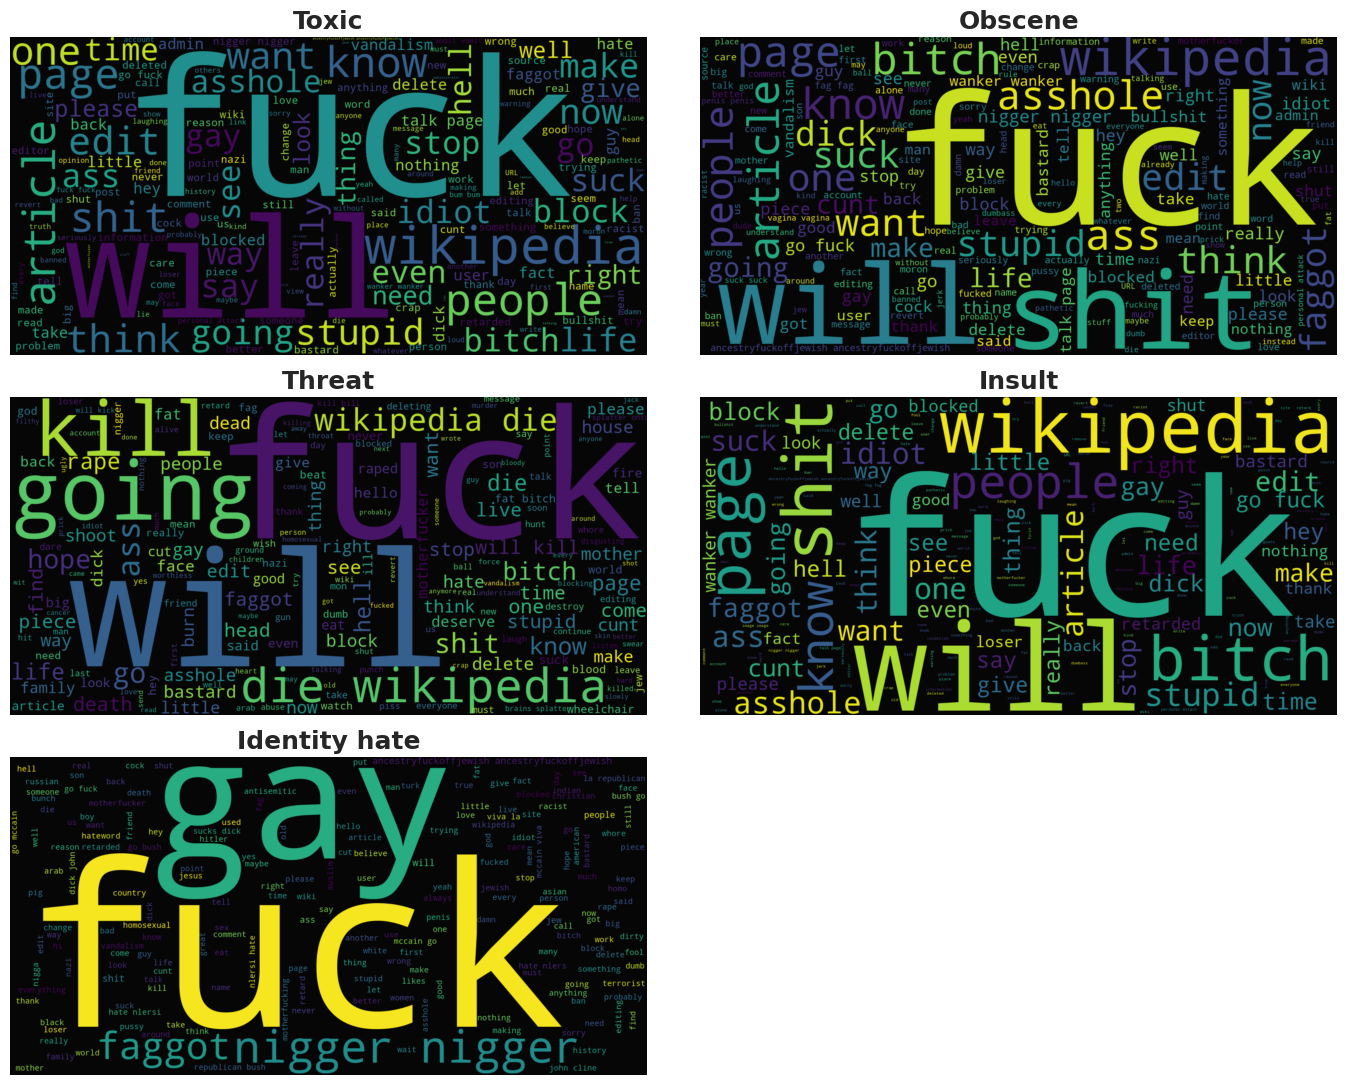

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have a DataFrame named 'train_df' with columns 'cleaned_text' and category columns

# Determine the number of rows and columns based on the number of labels
num_labels = len(category_columns)
rows = (num_labels + 1) // 2  # Integer division for ceiling
cols = min(2, num_labels)  # Maximum of 2 columns to avoid empty subplots

# Set up the figure for a flexible grid layout
fig, axes = plt.subplots(rows, cols, figsize=(14, 11))  # Adjust figsize as needed

# Flatten the axes for iteration
axes = axes.flatten()

# Generate word clouds for each class and plot in the grid
for i, label in enumerate(category_columns):
    # Filter comments belonging to the current class
    class_comments = train_df[train_df[label] == 1]['cleaned_text'].dropna()

    # Concatenate all comments into a single string
    text = ' '.join(class_comments)

    if not text.strip():  # Check if there's no text for the class
        axes[i].text(0.5, 0.5, "No data available", ha='center', va='center', fontsize=16, fontweight='bold')
    else:
        # Generate the word cloud
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='#060606',
            colormap='viridis',
            max_words=200,
            scale=2
        ).generate(text)

        # Plot the word cloud in the corresponding subplot
        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].set_title(
            label.replace('_', ' ').capitalize(),
            fontsize=18,
            fontweight='bold'
        )
        axes[i].axis('off')

# Hide any empty subplots beyond the number of labels
if num_labels < rows * cols:
    for i in range(num_labels, rows * cols):
        axes[i].axis('off')

plt.tight_layout(h_pad=1.0, w_pad=1.0)  # Adjust spacing for a clean layout
plt.show()

# Handle Imbalance Labels

In [36]:
# Handle Imbalanced labels
import pandas as pd

# Define target count
TARGET_COUNT = 15000

# Initialize a list to store the oversampled data
oversampled_data = [train_df]

# Loop through each label
label_columns = ['toxic', 'obscene', 'threat', 'insult', 'identity_hate']
for label in label_columns:
    # Filter rows where the current label is 1
    label_rows = train_df[train_df[label] == 1]

    # Identify rows where the current label is 1 and all other labels are 0 (unique rows for this label)
    unique_rows = label_rows[(train_df[label_columns].sum(axis=1) == 1)]

    # Calculate the number of duplicates needed
    current_count = len(label_rows)
    unique_count = len(unique_rows)
    if current_count < TARGET_COUNT:
        # Determine how many more rows are needed to reach the target count
        additional_count = TARGET_COUNT - current_count

        if unique_count > 0:
            # Oversample using unique rows if available
            duplicates = unique_rows.sample(n=additional_count, replace=True, random_state=42)
            oversampled_data.append(duplicates)
        else:
            print(f"No unique rows available for label '{label}'. Skipping unique oversampling.")

# Combine the original data with the oversampled data
balanced_df = pd.concat(oversampled_data, ignore_index=True)

# Shuffle the dataset to mix the duplicates with the original data
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Exploratory Data Analysis 2 (EDA) - Visualization

In [37]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72548 entries, 0 to 72547
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             72548 non-null  object
 1   comment_text   72548 non-null  object
 2   toxic          72548 non-null  int64 
 3   obscene        72548 non-null  int64 
 4   threat         72548 non-null  int64 
 5   insult         72548 non-null  int64 
 6   identity_hate  72548 non-null  int64 
 7   cleaned_text   72548 non-null  object
 8   word_count     72548 non-null  int64 
 9   tag_count      72548 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 5.5+ MB


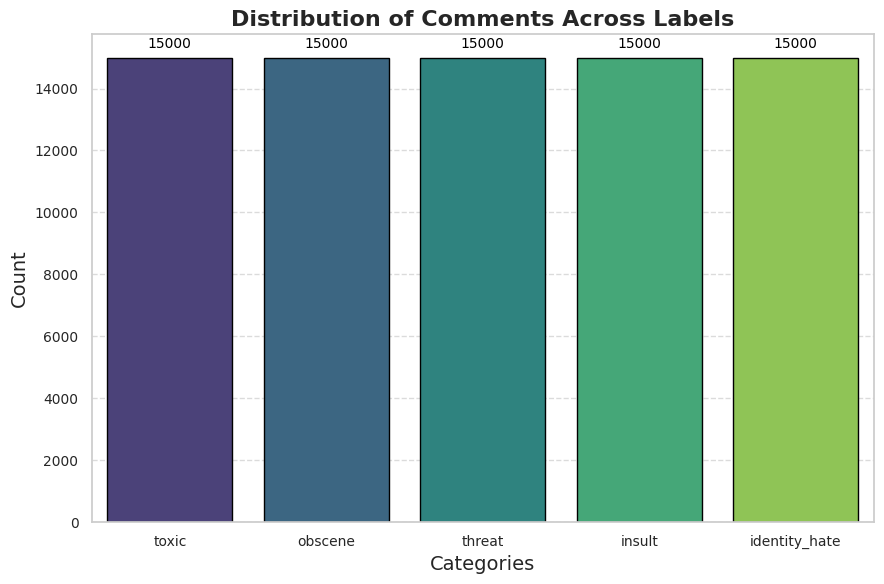

In [38]:
#Distribution of Comments Across Labels

# Set a style for the plot
sns.set(style="whitegrid")

# Visualize the distribution of the target labels
plt.figure(figsize=(9, 6))
barplot = sns.barplot(
    x=balanced_df[['toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum().index,
    y=balanced_df[['toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum().values,
    palette='viridis', edgecolor='black'
)

# Add counts on top of each bar
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=10, color='black', 
                     xytext=(0, 5),  # Adjusts the position of the text
                     textcoords='offset points')

# Enhance title and labels
plt.title("Distribution of Comments Across Labels", fontsize=16, fontweight='bold')
plt.ylabel("Count", fontsize=14)

plt.xlabel("Categories", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

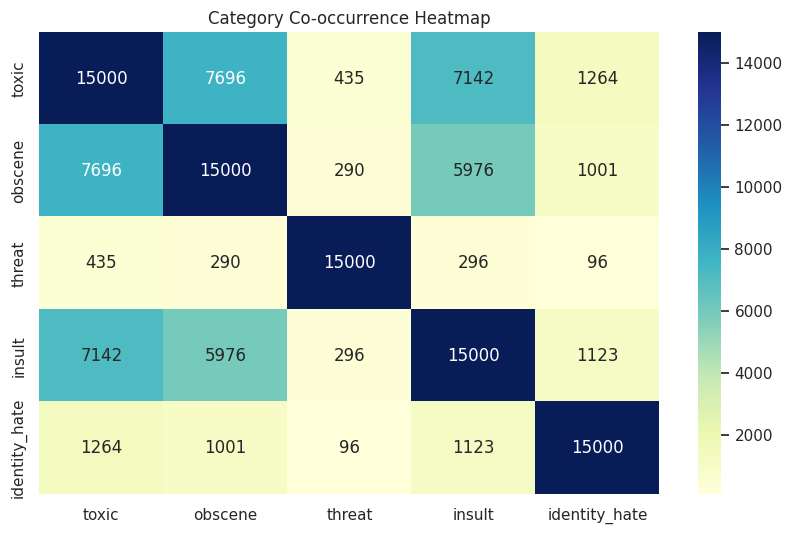

In [39]:
#Co-occurrence 

# Create a co-occurrence matrix by transposing and dot product
co_occurrence_matrix = balanced_df[category_columns].T.dot(balanced_df[category_columns])

# Optional: Remove diagonal (self-correlation) for a cleaner plot
#np.fill_diagonal(co_occurrence_matrix.values, 0)
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(co_occurrence_matrix, annot=True, cmap="YlGnBu", fmt="d", cbar=True)
plt.title("Category Co-occurrence Heatmap")
plt.show()

# Model Training and Evaluation

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.multiclass import OneVsRestClassifier

# Define feature and target variables
X = balanced_df['cleaned_text']
y = balanced_df[['toxic', 'obscene', 'insult', 'threat', 'identity_hate']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf_vect = TfidfVectorizer(max_features=20000)
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

# Initialize the OneVsRest classifier with Logistic Regression
model = OneVsRestClassifier(LogisticRegression(C=10, max_iter=1000))

# Train the model
model.fit(X_train_tfidf, y_train)

# Predict on the test set for all labels
y_pred = model.predict(X_test_tfidf)

# Evaluate the model for each label
results = []
for idx, label in enumerate(y.columns):
    # Calculate and print accuracy for each label
    accuracy = accuracy_score(y_test[label], y_pred[:, idx])
    results.append({"Label": label, "Accuracy": f"{accuracy:.4f}"})
    
    # Print classification report for each label
    print(f"Classification report for {label}:")
    print(classification_report(y_test[label], y_pred[:, idx]))
    print("\n" + "-"*50 + "\n")

# Display accuracy results in a table format with borders
results_df = pd.DataFrame(results)
print(results_df.to_markdown(index=False, tablefmt="grid"))

Classification report for toxic:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     11459
           1       0.91      0.79      0.85      3051

    accuracy                           0.94     14510
   macro avg       0.93      0.89      0.91     14510
weighted avg       0.94      0.94      0.94     14510


--------------------------------------------------

Classification report for obscene:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     11487
           1       0.93      0.87      0.90      3023

    accuracy                           0.96     14510
   macro avg       0.95      0.93      0.94     14510
weighted avg       0.96      0.96      0.96     14510


--------------------------------------------------

Classification report for insult:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     11503
           1       0.87      

In [41]:
import joblib

# Save the model
joblib.dump(model, "cyberbullying_model.pkl")
# Save the vectorizer
joblib.dump(tfidf_vect, "tfidf_vectorizer.pkl")

print("Model and vectorizer saved successfully.")

Model and vectorizer saved successfully.


In [42]:
# Define your prediction function
def predict_text(text, model, vectorizer):
    # Clean the input text using your `clean_text` function
    cleaned_text = clean_text(text)
    
    # Transform the cleaned text using the vectorizer
    vectorized_text = vectorizer.transform([cleaned_text])
    
    # Get the predicted probabilities for each class
    probabilities = model.predict_proba(vectorized_text)[0]
    
    # Define the labels for each class
    labels = ['toxic', 'obscene', 'insult', 'threat', 'identity_hate']
    
    # Get the classes with probability > 0.5 (you can adjust this threshold)
    predicted_labels = [labels[i] for i in range(len(probabilities)) if probabilities[i] > 0.5]
    
    # If no labels are predicted (i.e., all probabilities <= 0.5), classify as "not_cyberbullying"
    if not predicted_labels:
        return cleaned_text,'not_cyberbullying'
    
    # Return the predicted labels along with their probabilities
    result = {label: probabilities[labels.index(label)] for label in predicted_labels}
    
    return cleaned_text , result


# Load the saved model and vectorizer
model = joblib.load('/kaggle/working/cyberbullying_model.pkl')
vectorizer = joblib.load('/kaggle/working/tfidf_vectorizer.pkl')



In [43]:
# Example usage: Let's say a user provides an input
user_input = "Wow, you actually managed to finish that project on time. Guess miracles do happen for someone like you."

# Get predictions
cleaned_text, predictions = predict_text(user_input, model, vectorizer)

print(cleaned_text)

if predictions == 'not_cyberbullying':
    print("This is not a cyberbullying comment.")
else:
    print("Predicted categories and probabilities:", predictions)


wow you actually managed to finish that project on time guess miracles do happen for someone like you
This is not a cyberbullying comment.
